<a href="https://colab.research.google.com/github/ykim879/whats.todays.trend/blob/master/revised_news.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import queue
import threading
def eachNewsHeadlines(ID, q):
	response = requests.get('https://newsapi.org/v2/top-headlines?sources=' + ID + '&apiKey=' + key)
	json = response.json()
	if json['status'] != 'ok':
		raise IOError('API key is probably overused :(')
	topNews = []
	topNews.append(ID)
	for elem in json['articles']:
		topNews.append(elem['title'])
	q.put(topNews)

In [3]:
import requests
import pandas as pd
key = '5e74c7cf9e344e3e8c04210f9b75125b'
response = requests.get('https://newsapi.org/v2/sources?'
			   'language=en&country=us&'
			   'apiKey=' + key)
sources = response.json()['sources']
df = pd.DataFrame();
pd.set_option('display.max_columns', 7)
for source in sources:
  row = pd.Series(source)
  df = df.append(row, ignore_index = True)
df.set_index("name", inplace = True)
#collects headline
threads = []
q = queue.Queue()
for id in df['id']:
  t = threading.Thread(target = eachNewsHeadlines, args = (id, q))
  threads.append(t)
  t.start()
for t in threads:
  t.join()
headlines = []
while not q.empty():
  headlines.extend(q.get())

Exception in thread Thread-42:
Traceback (most recent call last):
  File "/Users/yiyeon1/opt/anaconda3/lib/python3.8/site-packages/urllib3/connection.py", line 159, in _new_conn
    conn = connection.create_connection(
  File "/Users/yiyeon1/opt/anaconda3/lib/python3.8/site-packages/urllib3/util/connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "/Users/yiyeon1/opt/anaconda3/lib/python3.8/socket.py", line 918, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 8] nodename nor servname provided, or not known

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/yiyeon1/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py", line 670, in urlopen
    httplib_response = self._make_request(
  File "/Users/yiyeon1/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionp

       keywords  counts
0         watch      19
1        voting      18
2         trump      17
3          time      16
4       thehill      15
5        states      14
6  pennsylvania      13
7       insider      12
8           ign      11
9      election      10


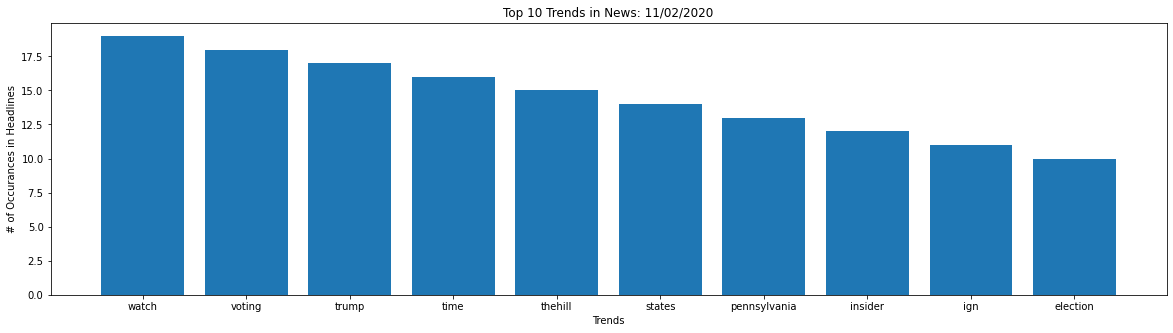

In [27]:
from sklearn.feature_extraction import text
import matplotlib.pyplot as plt
from datetime import date

today = date.today()
d1 = today.strftime("%m/%d/%Y")
stop_words = text.ENGLISH_STOP_WORDS.union({'says','news','new'})
vectorizer1 = text.CountVectorizer(stop_words=stop_words, min_df= 10)
vectorizer2 = text.CountVectorizer(stop_words=stop_words)
X = vectorizer1.fit_transform(headlines)
keywordDCT = sorted(vectorizer1.vocabulary_.items(), key = lambda x:x[1], reverse = True)
keywordDF = pd.DataFrame(keywordDCT, columns = ['keywords', 'counts'])
print(keywordDF[:10])
plt.figure(figsize=(20,5))
plt.bar(keywordDF['keywords'][:10], keywordDF['counts'][:10])
plt.title('Top 10 Trends in News: ' + d1)
plt.ylabel('# of Occurances in Headlines')
plt.xlabel('Trends')
plt.show()

In [25]:
keywordDF

,keywords,counts
0,watch,13
1,trump,12
2,time,11
3,pennsylvania,10
4,insider,9
5,ign,8
6,election,7
7,day,6
8,covid,5
9,court,4


# Data for csv label
1. import the Data
2. change Category to integer values which are 0 to 4
3. split the data to prediction set and test set

In [3]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_extraction import text
import matplotlib.pyplot as plt
stop_words = text.ENGLISH_STOP_WORDS
data = pd.read_csv('BBC News Train.csv')
print("The original files: Total: 1489 documents with 5 categories")
print(data)

The original files: Total: 1489 documents with 5 categories
      ArticleId                                               Text  \
0          1833  worldcom ex-boss launches defence lawyers defe...   
1           154  german business confidence slides german busin...   
2          1101  bbc poll indicates economic gloom citizens in ...   
3          1976  lifestyle  governs mobile choice  faster  bett...   
4           917  enron bosses in $168m payout eighteen former e...   
...         ...                                                ...   
1485        857  double eviction from big brother model caprice...   
1486        325  dj double act revamp chart show dj duo jk and ...   
1487       1590  weak dollar hits reuters revenues at media gro...   
1488       1587  apple ipod family expands market apple has exp...   
1489        538  santy worm makes unwelcome visit thousands of ...   

           Category  
0          business  
1          business  
2          business  
3          

In [4]:
#step 2
digit_data = data
digit_label = {'business': 0, 'entertainment': 1, 'politics': 2, 'sport': 3, 'tech': 4}
for label in digit_label.keys():
    digit_data.loc[digit_data["Category"]== label,"Category",]= digit_label[label]
digit_data

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,0
1,154,german business confidence slides german busin...,0
2,1101,bbc poll indicates economic gloom citizens in ...,0
3,1976,lifestyle governs mobile choice faster bett...,4
4,917,enron bosses in $168m payout eighteen former e...,0
...,...,...,...
1485,857,double eviction from big brother model caprice...,1
1486,325,dj double act revamp chart show dj duo jk and ...,1
1487,1590,weak dollar hits reuters revenues at media gro...,0
1488,1587,apple ipod family expands market apple has exp...,4


In [9]:
from sklearn.model_selection import train_test_split
import numpy as np
#split data into train set and test set
df_x = digit_data["Text"]
df_y = digit_data["Category"]
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=4)
y_train = y_train.astype('int')
y_test = np.array(y_test)

In [10]:
limited_data = data
limited_data = limited_data.groupby('Category', sort=True)['Text'].apply(' '.join).reset_index()
print("The appended documents depending on the categories")
print(limited_data)

The appended documents depending on the categories
   Category                                               Text
0         0  worldcom ex-boss launches defence lawyers defe...
1         1  french honour for director parker british film...
2         2  howard  truanted to play snooker  conservative...
3         3  wales silent on grand slam talk rhys williams ...
4         4  lifestyle  governs mobile choice  faster  bett...


# Prediction Model
1. predict_data: calculate the true positive rate depedning on the threshold
2. find true positive rate for mindf = [0,10]
3. print the result

In [14]:
from sklearn.naive_bayes import MultinomialNB
def predict_data(threshold):
    cv = text.CountVectorizer(stop_words=stop_words, min_df = threshold)
    xtrain_v = cv.fit_transform(x_train)
    xtest_v = cv.transform(x_test)
    mnb = MultinomialNB()
    mnb.fit(xtrain_v,y_train)
    predictions = mnb.predict(xtest_v)
    count = 0
    for i in range (len(predictions)):
        if predictions[i]== y_test[i]:
            count=count+1
    return count/len(predictions)

In [16]:
#step 2:
true_positive_rate = {}
for i in range(11):
    true_positive_rate[i] = (predict_data(i))
true_positive_rate

{0: 0.9697986577181208,
 1: 0.9697986577181208,
 2: 0.9697986577181208,
 3: 0.9664429530201343,
 4: 0.9697986577181208,
 5: 0.9664429530201343,
 6: 0.9731543624161074,
 7: 0.9697986577181208,
 8: 0.9697986577181208,
 9: 0.959731543624161,
 10: 0.9630872483221476}

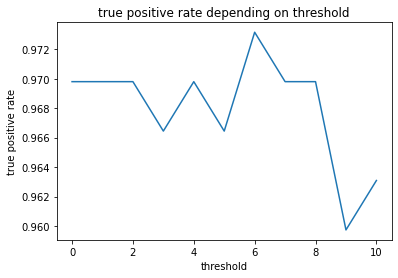

threshold for vocabulary ignore terms:  0  true positive rate: 0.9697986577181208
threshold for vocabulary ignore terms:  1  true positive rate: 0.9697986577181208
threshold for vocabulary ignore terms:  2  true positive rate: 0.9697986577181208
threshold for vocabulary ignore terms:  3  true positive rate: 0.9664429530201343
threshold for vocabulary ignore terms:  4  true positive rate: 0.9697986577181208
threshold for vocabulary ignore terms:  5  true positive rate: 0.9664429530201343
threshold for vocabulary ignore terms:  6  true positive rate: 0.9731543624161074
threshold for vocabulary ignore terms:  7  true positive rate: 0.9697986577181208
threshold for vocabulary ignore terms:  8  true positive rate: 0.9697986577181208
threshold for vocabulary ignore terms:  9  true positive rate: 0.959731543624161
threshold for vocabulary ignore terms:  10  true positive rate: 0.9630872483221476
Best threshold:  6  true positive rate:  10


In [19]:
#step 3:
plt.plot(true_positive_rate.keys(), true_positive_rate.values())
plt.title('true positive rate depending on threshold')
plt.ylabel('true positive rate')
plt.xlabel('threshold')
plt.show()
for min_df in true_positive_rate.keys():
    print("threshold for vocabulary ignore terms: ", min_df, " true positive rate:", true_positive_rate[min_df])
print("Best threshold: ", max(true_positive_rate,  key=true_positive_rate.get), " true positive rate: ", max(true_positive_rate))


In [8]:
r,c = limited_data.shape
documents = []
len_documents = []
y_train = []
MAX_DOCUMENTS = 3000
for i in range(r):
    document = str(limited_data.loc[i,'Text'])
    y_train.append(str(limited_data.loc[i,'Category']))
    len_documents.append(len(document))
    documents.extend(document)
documents.extend(keywordDF['keywords'][:10].tolist()) #extend keywords
#Form bag of words model using words used at least 10 times
v = text.CountVectorizer(stop_words=stop_words, min_df = 10)
print(documents)
train = v.fit_transform(documents).toarray()
x_train = []
for i in len(len_documents) - 1:
    x_train.append(train[:len_documents[i], :])#store in train_x
gnb = GaussianNB()
label = gnb.fit(data[x_train, y_train]).predict(train[len_documents[-1]:])
print(label)#X_test: keywords, x_train, y_train: trained data

['w', 'o', 'r', 'l', 'd', 'c', 'o', 'm', ' ', 'e', 'x', '-', 'b', 'o', 's', 's', ' ', 'l', 'a', 'u', 'n', 'c', 'h', 'e', 's', ' ', 'd', 'e', 'f', 'e', 'n', 'c', 'e', ' ', 'l', 'a', 'w', 'y', 'e', 'r', 's', ' ', 'd', 'e', 'f', 'e', 'n', 'd', 'i', 'n', 'g', ' ', 'f', 'o', 'r', 'm', 'e', 'r', ' ', 'w', 'o', 'r', 'l', 'd', 'c', 'o', 'm', ' ', 'c', 'h', 'i', 'e', 'f', ' ', 'b', 'e', 'r', 'n', 'i', 'e', ' ', 'e', 'b', 'b', 'e', 'r', 's', ' ', 'a', 'g', 'a', 'i', 'n', 's', 't', ' ', 'a', ' ', 'b', 'a', 't', 't', 'e', 'r', 'y', ' ', 'o', 'f', ' ', 'f', 'r', 'a', 'u', 'd', ' ', 'c', 'h', 'a', 'r', 'g', 'e', 's', ' ', 'h', 'a', 'v', 'e', ' ', 'c', 'a', 'l', 'l', 'e', 'd', ' ', 'a', ' ', 'c', 'o', 'm', 'p', 'a', 'n', 'y', ' ', 'w', 'h', 'i', 's', 't', 'l', 'e', 'b', 'l', 'o', 'w', 'e', 'r', ' ', 'a', 's', ' ', 't', 'h', 'e', 'i', 'r', ' ', 'f', 'i', 'r', 's', 't', ' ', 'w', 'i', 't', 'n', 'e', 's', 's', '.', ' ', ' ', 'c', 'y', 'n', 't', 'h', 'i', 'a', ' ', 'c', 'o', 'o', 'p', 'e', 'r', ' ', ' ',

ValueError: After pruning, no terms remain. Try a lower min_df or a higher max_df.

# Evaluation
store predicted data and evaluation from user whether the label is valid
Evaluate the True Positive Rate and Fale Positive Rate by ROC curve
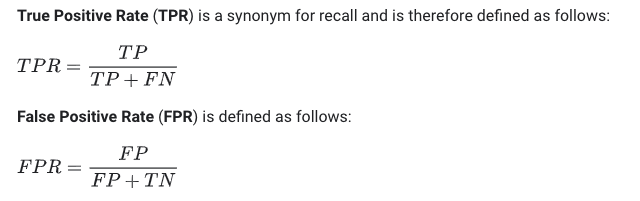

In [ ]:
#get DataFrame from csv
#add current data
#do functions
#store data to csv